In [292]:
import struct
import numpy as np
from array import array
import matplotlib.pyplot as plt
import math
import numpy.linalg as LA



def load_mnist(dataset="training", selecteddigits=range(10),  path=r'C:\Users\Greentea\Desktop\ucsc\ML\hw\03\train-images-idx3-ubyte_1'):
    # Check training/testing specification. Must be "training" (default) or "testing"
    if dataset == "training":
        fname_digits = path + '\\' + 'train-images.idx3-ubyte'
        fname_labels = path + '\\' + 'train-labels.idx1-ubyte'
    elif dataset == "testing":
        fname_digits = path + '\\' + 't10k-images.idx3-ubyte'
        fname_labels = path + '\\' + 't10k-labels.idx1-ubyte'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Import digits data
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", digitsfileobject.read(16))
    digitsdata = array("B", digitsfileobject.read())
    digitsfileobject.close()

    # Import label data
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size = struct.unpack(">II", labelsfileobject.read(8))
    labelsdata = array("B", labelsfileobject.read())
    labelsfileobject.close()

    # Find indices of selected digits
    indices = [k for k in range(size) if labelsdata[k] in selecteddigits]
    N = len(indices)

    # Create empty arrays for X and T
    X = np.zeros((N, rows * cols), dtype=np.uint8)
    T = np.zeros((N, 1), dtype=np.uint8)

    for i in range(N):
        X[i] = digitsdata[indices[i] * rows * cols:(indices[i] + 1) * rows * cols]
        T[i] = labelsdata[indices[i]]
    return X, T


def vectortoimg(v, show=True):
    plt.imshow(v.reshape(28, 28), interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()



# plot reduced dimension dataset
def plotP1P2(XX, TT):
    from matplotlib import cm
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.set_title(" 2 VS 7, Reduced data 784 -> 2", fontsize=14)
    ax.set_xlabel("2: Blue          7: Red", fontsize=12)
    ax.grid(True, linestyle='-', color='0.75')
    zz = np.random.random(len(XX[TT == 1][:, 0]))
    ax.scatter(XX[TT == 2][:, 0], XX[TT == 2][:, 1], s=3, c='blue', marker='o');
    ax.scatter(XX[TT == 7][:, 0], XX[TT == 7][:, 1], s=3, c='red', marker='o');
    ax.scatter(np.mean(XX[:, 0]), np.mean(XX[:, 1]), s=100, c='green', marker='o');
    # ax.scatter(XX[:,0],XX[:,1],s=20,c=zz, marker = 'o', cmap = cm.jet );
    plt.show()


def cal_prob(T_predict,TT):
    count1=0
    for i in range(TT.shape[0]):
            if TT[i] == T_predict[i]: 
                count1 += 1
#     print(count1/TT.shape[0])
    return (count1/TT.shape[0])

Checking multiple training vectors by plotting images.
Be patient:


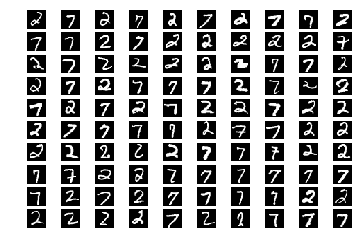

In [293]:
X, T = load_mnist(dataset="training", selecteddigits=[2, 7])
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure()
nrows = 10
ncols = 10
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row * ncols + col + 1)
        vectortoimg(X[np.random.randint(len(T))], show=False)
plt.show()

100th label is [7]
82th label is [2]


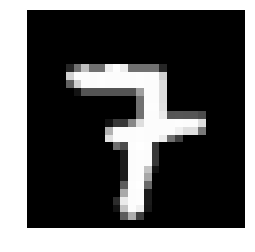

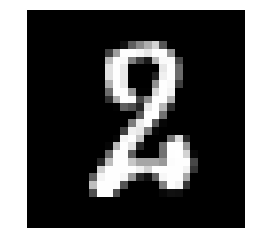

In [294]:
print("100th label is " +str(T[100]))
print("82th label is " + str(T[82]))

vectortoimg(X[100])
vectortoimg(X[82])


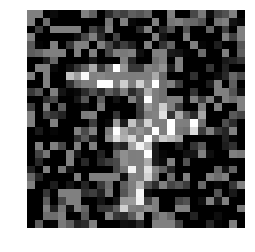

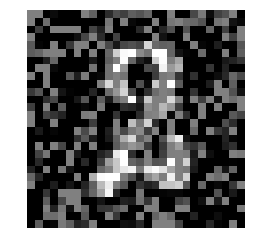

In [295]:
#add noise

import random

noise = np.round(np.clip(np.random.normal(0,1,28*28) * 255, 0, 255))
X_noise = np.add(X,noise)

vectortoimg(X_noise[100])
vectortoimg(X_noise[82])

w/o noise


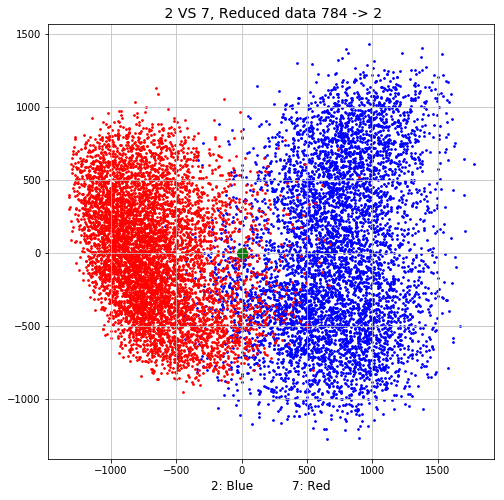

Noise_PCA


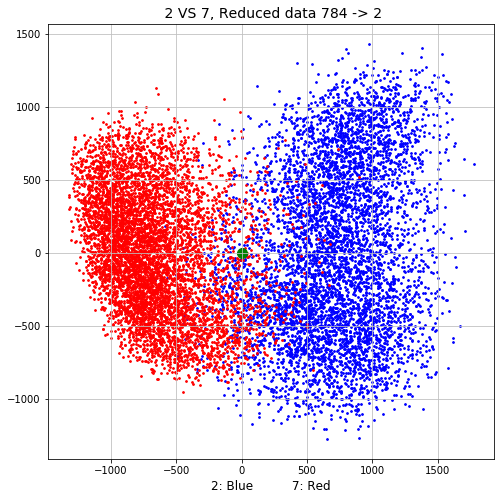

Noise_PCA with original matrix


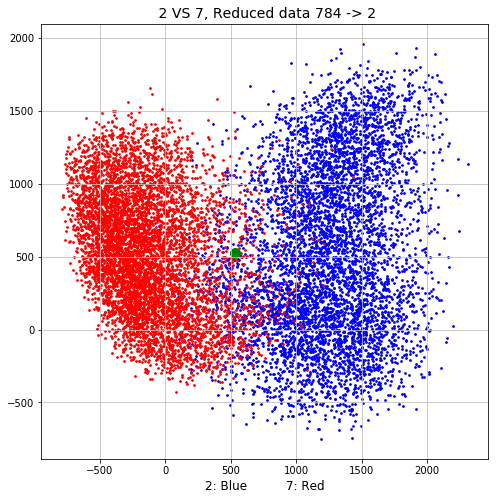

In [296]:
#normal

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(X)
print("w/o noise")
plotP1P2(reduced_data_pca, TT)

#noise
print("Noise_PCA")
pca2 = PCA(n_components=2)
X_pca_noise = pca2.fit_transform(X_noise)
plotP1P2(X_pca_noise, TT)

#noise with original matrix
print("Noise_PCA with original matrix")
X_pca_noise = pca.transform(X_noise)
plotP1P2(X_pca_noise, TT)


Check accuracy Step

In [298]:
Xtest, Ttest = load_mnist(dataset="testing", selecteddigits=[2, 7])

In [299]:
reduced_data_pca_test = pca.fit_transform(Xtest)
reduced_data_pca_test_noise = pca2.fit_transform(Xtest+noise)


In [300]:
#Gaussian Naive_bayes without noise

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(reduced_data_pca,TT)
T_out = gnb.predict(reduced_data_pca_test)

prob_gnb = cal_prob(T_out,Ttest)
prob_gnb

0.9495145631067962

In [301]:
#Gaussian Naive_bayes with noise
T_out_noise = gnb.predict(reduced_data_pca_test_noise)
prob_gnb_noise = cal_prob(T_out_noise,Ttest)
prob_gnb_noise

0.9495145631067962

In [302]:
#Train new model with noise data

gnb_noise = GaussianNB()
gnb_noise.fit(X_pca_noise,TT)
T_out_new_noise_model = gnb_noise.predict(reduced_data_pca_test_noise)
prob_gnb__new_noise_model = cal_prob(T_out_new_noise_model,Ttest)
prob_gnb__new_noise_model

0.8490291262135923

In [303]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(reduced_data_pca,TT)
T_lr=lr.predict(reduced_data_pca_test)

prob_lr= cal_prob(T_lr,Ttest)
prob_lr

0.9485436893203884

In [304]:
T_lr_noise=lr.predict(reduced_data_pca_test_noise)

prob_lr_noise= cal_prob(T_lr_noise,Ttest)
prob_lr_noise

0.9485436893203884

In [305]:
#Train new model with noise data and LogisticRegression

lr2 = LogisticRegression()
lr2.fit(X_pca_noise,TT)
T_lr2=lr2.predict(reduced_data_pca_test)
prob_lr2= cal_prob(T_lr2,Ttest)
prob_lr2

0.8567961165048543

Noise_PCA with original matrix


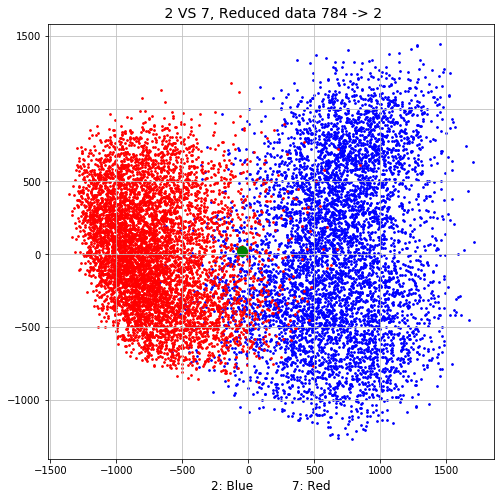

In [309]:
#noise
print("Noise_PCA with original matrix")
X_noise2 = pca.transform()
X_pca_noise_2 = pca.transform(X_noise)
plotP1P2(X_pca_noise_2, TT)